In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

import re
from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer

In [66]:
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer

In [67]:
train = pd.read_csv('F:\mine\sentiment-analysis-on-movie-reviews/sentiment_train.tsv' , sep = '\t')
test = pd.read_csv('F:\mine\sentiment-analysis-on-movie-reviews\sentiment_test.tsv' , sep = '\t')

In [9]:
train.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [11]:
test.head()

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine


In [12]:
train.isna().sum()


PhraseId      0
SentenceId    0
Phrase        0
Sentiment     0
dtype: int64

In [13]:
test.isna().sum()


PhraseId      0
SentenceId    0
Phrase        1
dtype: int64

In [14]:
test['Phrase'].fillna('Unknown', inplace=True)

C:\Users\pc\AppData\Local\Temp\ipykernel_11924\1349236820.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Phrase'].fillna('Unknown', inplace=True)


In [15]:
test.isna().sum()


PhraseId      0
SentenceId    0
Phrase        0
dtype: int64

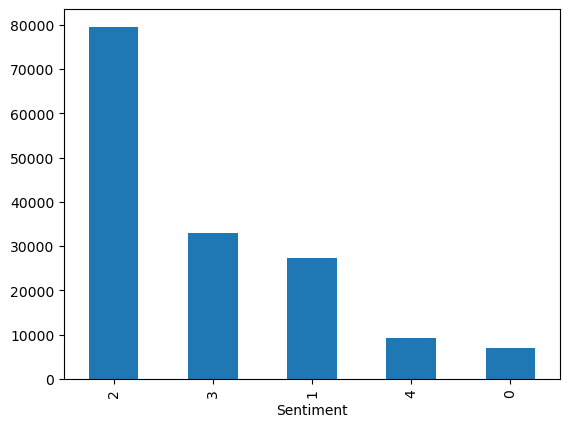

In [19]:
train.Sentiment.value_counts().plot(kind='bar')
plt.show()

In [20]:
stemmer = SnowballStemmer(language = 'english')

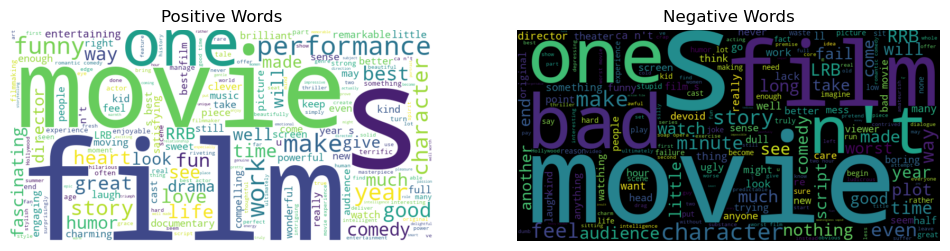

In [22]:
positive_text = ' '.join(train[train['Sentiment'] == 4]['Phrase'])
negative_text = ' '.join(train[train['Sentiment'] == 0]['Phrase'])

positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
negative_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(negative_text)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Words')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Words')

plt.show()


In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
vectorizer =  TfidfVectorizer()

In [50]:
english_stopwords = stopwords.words('english')
", ".join(english_stopwords)

"a, about, above, after, again, against, ain, all, am, an, and, any, are, aren, aren't, as, at, be, because, been, before, being, below, between, both, but, by, can, couldn, couldn't, d, did, didn, didn't, do, does, doesn, doesn't, doing, don, don't, down, during, each, few, for, from, further, had, hadn, hadn't, has, hasn, hasn't, have, haven, haven't, having, he, he'd, he'll, her, here, hers, herself, he's, him, himself, his, how, i, i'd, if, i'll, i'm, in, into, is, isn, isn't, it, it'd, it'll, it's, its, itself, i've, just, ll, m, ma, me, mightn, mightn't, more, most, mustn, mustn't, my, myself, needn, needn't, no, nor, not, now, o, of, off, on, once, only, or, other, our, ours, ourselves, out, over, own, re, s, same, shan, shan't, she, she'd, she'll, she's, should, shouldn, shouldn't, should've, so, some, such, t, than, that, that'll, the, their, theirs, them, themselves, then, there, these, they, they'd, they'll, they're, they've, this, those, through, to, too, under, until, up, 

In [51]:
selected_stopwords = english_stopwords[:115]

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer =  TfidfVectorizer(tokenizer = tokenize ,
                              stop_words = selected_stopwords,
                              ngram_range = (1,2),
                              max_features = 1000
                             )

In [55]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [56]:
%%time
vectorizer.fit(train.Phrase)

CPU times: total: 45.9 s
Wall time: 51.6 s


TfidfVectorizer(max_features=1000, ngram_range=(1, 2),
                stop_words=['a', 'about', 'above', 'after', 'again', 'against',
                            'ain', 'all', 'am', 'an', 'and', 'any', 'are',
                            'aren', "aren't", 'as', 'at', 'be', 'because',
                            'been', 'before', 'being', 'below', 'between',
                            'both', 'but', 'by', 'can', 'couldn', "couldn't", ...],
                tokenizer=<function tokenize at 0x0000024313B1B240>)

In [57]:
%%time
train_inputs = vectorizer.transform(train.Phrase)

CPU times: total: 46.4 s
Wall time: 49.2 s


In [58]:
%%time
test_inputs = vectorizer.transform(test.Phrase)

CPU times: total: 18.8 s
Wall time: 19.1 s


In [59]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [60]:
X = train_inputs
y = train.Sentiment

In [61]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
xgb_model = XGBClassifier(
        # Seed for reproducibility
)

In [63]:
# %%time
# # Fitting the model
# xgb_model.fit(X_train, y_train)

# # Prediction on validation set
# y_pred = xgb_model.predict(X_val)

# # Evaluating accuracy
# accuracy = accuracy_score(y_val, y_pred)
# print("Validation Accuracy:", accuracy)

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred1 = model.predict(X_val)

accuracy_score(y_val, y_pred1)

KeyboardInterrupt: 